# Team Swings
## Shortest path for Managers of Swing
# ---------------------
## codes for Graph of Mohyun
## and codes for Graph of Swing Station with real world shortest distance (Euclidean Distance)
### - used dijkstra algorithm to find shortest path(length) between Stations

# -------------
### Get data and draw Mohyun map with graph
# -------------

In [3]:
## read Excel File (Location Data)
import pandas as pd
df = pd.read_excel(r'./Location.xlsx')
print(df)

    LocNum          x         y  degree_of_vertex   1     2     3     4     5  \
0        1  127.24712  37.33225                 2   2   4.0   NaN   NaN   NaN   
1        2  127.24891  37.33195                 3   1   3.0   5.0   NaN   NaN   
2        3  127.24993  37.33168                 1   2   NaN   NaN   NaN   NaN   
3        4  127.24821  37.33318                 3   1   5.0   6.0   NaN   NaN   
4        5  127.24933  37.33261                 3   2   4.0   7.0   NaN   NaN   
5        6  127.24899  37.33467                 3   4   7.0   9.0   NaN   NaN   
6        7  127.25035  37.33441                 5   5   6.0   8.0   9.0  10.0   
7        8  127.25134  37.33415                 2   7  10.0   NaN   NaN   NaN   
8        9  127.24918  37.33513                 3   6   7.0  14.0   NaN   NaN   
9       10  127.25176  37.33511                 5   7   8.0  11.0  14.0  16.0   
10      11  127.25323  37.33478                 3  10  12.0  18.0   NaN   NaN   
11      12  127.25319  37.33

## Graph Class

In [4]:
# From the chapter 14
class Graph:

    # ---------nested Vertex class-----------------
    class Vertex:
        """Lightweight vertex structure for a graph."""
        __slots__ = '_element'

        def __init__(self, x):
            """Return element associated with this vertex."""
            self._element = x

        def element(self):
            """Return element associated with this vertex."""
            return self._element

        def __hash__(self):  # will allow vertex to be a map/set key
            return hash(id(self))

    # -----------------------nested Edge Class ---------------------------
    class Edge:
        """Light weight edge structure for a graph"""
        __slots__ = '_origin', '_destination', '_element'

        def __init__(self, u, v, x):
            """Do not call constructor directly. Use Graph's insert_edge(u,v,x)."""
            self._origin = u
            self._destination = v
            self._element = x

        def endpoint(self):
            """Return (u,v) tuple for vertices u and v."""
            return (self._origin, self._destination)

        def opposite(self, v):
            """Return the vertex that is opposite v on this edge"""
            return self._destination if v is self._origin else self._origin

        def element(self):
            """Return element associated with this edge."""
            return self._element

        def __hash__(self):  # will allow edge to be a map/set key
            return hash((self._origin, self._destination))

# ------- Graph-------
    """Representation of a simple graph using an adjacency map."""

    def __init__(self, directed=False):
        # Create an empty graph (undirected, by default)
        # Graph is directed if optional parameter is set to True
        self._outgoing = {}
        # only create second map for directed graph; use alias for undirected
        self._incoming = {} if directed else self._outgoing

    def is_directed(self):
        """Return True if this is a directed graph; False if undirected.

Property is based on the original declaration of the graph, not its contents.
        """
        return self._incoming is not self._outgoing
        # directed if maps are distinct

    def vertex_count(self):
        """Return the number of vertices in the graph."""
        return len(self._outgoing)

    def vertices(self):
        """Return an iteration of all vertices of the graph."""
        return self._outgoing.keys()

    def edges(self):
        """Return a set of all edges of the graph."""
        result = set()  # avoid double-reporting edge of undirected graph
        for secondary_map in self._outgoing.values():
            result.update(secondary_map.values())
        return result

    def get_edge(self, u, v):
        """Return the edge from u to v, or None if not adjacent."""
        return self._outgoing[u].get(v)  # returns None if v not adjacent

    def degree(self, v, outgoing=True):
        """Return number of (outgoing) edges incident to vertex v in the graph.
        If graph is directed, optional parameter used to count incoming edges.
        """
        adj = self._outgoing if outgoing else self._incoming
        return len(adj[v])

    def incident_edges(self, v, outgoing=True):
        """ Return all (outgoing) edges incident to vertex v in the graph.
        If graph is directed, optional parameter used to request incoming edges.
        """
        adj = self._outgoing if outgoing else self._incoming
        for edge in adj[v].values():
            yield edge

    def insert_vertex(self, x=None):
        """insert and return a new vertex with element x. """
        v = self.Vertex(x)
        self._outgoing[v] = {}
        if self.is_directed():
            self._incoming[i] = {}
        return v

    def insert_edge(self, u, v, x=None):
        """Insert and return a new Edge from u to v with auxiliary element x."""
        e = self.Edge(u, v, x)
        self._outgoing[u][v] = e
        self._incoming[v][u] = e


## Draw and Build Graph (Mohyun map)

In [5]:
import networkx as nx

In [6]:
# build map graph
G = Graph()
GV= nx.Graph() # variable for visualization

# insert vertices
verticesList = []
for i in df['LocNum']:
    verticesList.append(G.insert_vertex(i))
    
GV.add_nodes_from(df['LocNum'])

# get position information of vertices
position = {}
for i in df['LocNum']:
    position[i] = (df['x'][i-1],df['y'][i-1])

In [7]:
# build edges information
for i in df['LocNum']:
    GV.add_edge(i,int(df[1][i-1]))
    if df[2][i-1].is_integer():
        GV.add_edge(i,int(df[2][i-1]))
    if df[3][i-1].is_integer():
        GV.add_edge(i,int(df[3][i-1]))
    if df[4][i-1].is_integer():
        GV.add_edge(i,int(df[4][i-1]))
    if df[5][i-1].is_integer():
        GV.add_edge(i,int(df[5][i-1]))
# set of u, v
edgeList = list(GV.edges())
length = []

import math
import decimal

# ===== insert_edge ======
for i in edgeList:
    node = [i[0], i[1]]
    """'length information' with latitude longitude will be very small.
    So, We multiplied the data by 10 power of 4 to make a significant difference between the data.
    """
    # (x1-x2) ^2
    posX = ((decimal.Decimal(df['x'][node[0]-1]) - decimal.Decimal(df['x'][node[1]-1])) * 10 ** 4) ** 2
    # (y1-y2) ^2
    posY = ((decimal.Decimal(df['y'][node[0]-1]) - decimal.Decimal(df['y'][node[1]-1])) * 10 ** 4) ** 2
    # length of road
    road = round(math.sqrt(round(posX, 4) + round(posY,4)),4)
    length.append(road)
    G.insert_edge( verticesList[i[0]-1], verticesList[i[1]-1], road)


In [8]:
pos = position
# some math labels
edge_labels = {}

for i in range(len(edgeList)):
    edge_labels[edgeList[i]] = length[i]
print(edge_labels)

{(1, 2): 18.1497, (1, 4): 14.3283, (2, 3): 10.5513, (2, 5): 7.823, (4, 5): 12.567, (4, 6): 16.8181, (5, 7): 20.6891, (6, 7): 13.8463, (6, 9): 4.9769, (7, 8): 10.2357, (7, 9): 13.7379, (7, 10): 15.742, (8, 10): 10.4785, (9, 14): 11.7175, (10, 11): 15.0659, (10, 14): 25.4468, (10, 16): 9.8387, (11, 12): 5.4148, (11, 18): 6.8, (12, 13): 15.1796, (13, 19): 11.5694, (14, 15): 5.7706, (14, 16): 27.2342, (15, 16): 27.5136, (15, 21): 7.2125, (16, 22): 4.4944, (16, 23): 11.2285, (17, 18): 5.6303, (18, 19): 16.1075, (18, 24): 6.3561, (19, 25): 6.3063, (20, 21): 52.5856, (21, 22): 27.9946, (21, 30): 31.4186, (22, 23): 10.1843, (22, 27): 14.0812, (23, 24): 5.022, (24, 25): 16.4451, (26, 27): 5.6321, (26, 28): 5.6515, (27, 29): 5.6089, (28, 29): 5.4332, (29, 31): 20.223, (30, 31): 29.6624, (30, 32): 9.2228, (31, 33): 10.1789, (32, 33): 29.9808, (32, 34): 29.8391, (32, 35): 37.2392, (33, 36): 28.4271, (34, 35): 19.9812, (35, 36): 9.3557}


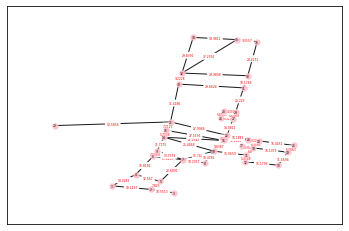

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw_networkx(GV,pos,edge_color='black',width=1,linewidths=0, node_size=40,node_color='pink',alpha=0.9, font_size=3, font_color = "black")
nx.draw_networkx_edge_labels(GV, pos,edge_labels, font_color='red',label_pos=0.5, font_size= 3,rotate=False)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.show()

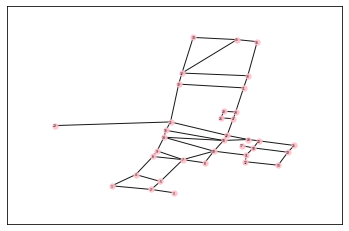

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw_networkx(GV,pos,edge_color='black',width=1,linewidths=0, node_size=40,node_color='pink',alpha=0.9, font_size=3, font_color = "black")

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.show()

# -------------
### preprocessing
# -------------

## Dijkstra Algorithm for New Station Graph
#### 1. vertex 2, 13, 20, 21, 23, 25, 30, 31, 35 is Station of Swing
#### 2. Start point will be "Shin An Apartment ; vertex #20" 

    ## Queue Class

In [11]:
# _______ Prioirity Queue _______
class PriorityQueueBase:
    """Abstract base class for a priority queue."""

    # ------------------------------ nested _Item class ------------------------------
    class _Item:
        """Lightweight composite to store priority queue items."""
        __slots__ = '_key', '_value'

        def __init__(self, k, v):
            self._key = k
            self._value = v

        def __lt__(self, other):
            return self._key < other._key    # compare items based on their keys

        def __repr__(self):
            return '({0},{1})'.format(self._key, self._value)

    # ------------------------------ public behaviors ------------------------------
    def is_empty(self):                  # concrete method assuming abstract len
        """Return True if the priority queue is empty."""
        return len(self) == 0

    def __len__(self):
        """Return the number of items in the priority queue."""
        raise NotImplementedError('must be implemented by subclass')

    def add(self, key, value):
        """Add a key-value pair."""
        raise NotImplementedError('must be implemented by subclass')

    def min(self):
        """Return but do not remove (k,v) tuple with minimum key.

        Raise Empty exception if empty.
        """
        raise NotImplementedError('must be implemented by subclass')

    def remove_min(self):
        """Remove and return (k,v) tuple with minimum key.

        Raise Empty exception if empty.
        """
        raise NotImplementedError('must be implemented by subclass')


class HeapPriorityQueue(PriorityQueueBase):
    def _parent(self, j):
        return (j-1)//2

    def _left(self, j):
        return 2*j+1

    def _right(self, j):
        return 2*j+2

    def _has_left(self, j):
        return self._left(j) < len(self._data)  # index beyond end of list?

    def _has_right(self, j):
        return self._right(j) < len(self._data)  # index beyond end of list?

    def _swap(self, i, j):
        """Swap the elements at indices i and j of array."""
        self._data[i], self._data[j] = self._data[j], self._data[i]

    def _upheap(self, j):
        parent = self._parent(j)
        if j > 0 and self._data[j] < self._data[parent]:
            self._swap(j, parent)
            self._upheap(parent)  # recur at position of parent

    def _downheap(self, j):
        if self._has_left(j):
            left = self._left(j)
            small_child = left  # although right may be smaller
            if self._has_right(j):
                right = self._right(j)
                if self._data[right] < self._data[left]:
                    small_child = right
            if self._data[small_child] < self._data[j]:
                self._swap(j, small_child)
                self._downheap(small_child)  # recur at position of small child

    # ------------------------------ public behaviors ----------------------------
    def __init__(self):
        """Create a new empty Priority Queue."""
        self._data = []

    def __len__(self):
        """Return the number of items in the priority queue."""
        return len(self._data)

    def add(self, key, value):
        """”””Add a key-value pair to the priority queue.”””"""
        self._data.append(self._Item(key, value))
        self._upheap(len(self._data)-1)  # upheap newly added position

    def min(self):
        """”””Return but do not remove (k,v) tuple with minimum key.
        Raise Empty exception if empty.
        ”””"""
        if self.is_empty():
            raise Empty('Priority queue is empty.')
        item = self._data[0]
        return (item._key, item._value)

    def remove_min(self):
        """”””Remove and return (k,v) tuple with minimum key.
        Raise Empty exception if empty.
        ”””"""
        if self.is_empty():
            raise Empty('Priority queue is empty.')
        self._swap(0, len(self._data)-1)  # put minimum item at the end
        item = self._data.pop()  # and remove it from the list;
        self._downheap(0)  # then fix new root
        return (item._key, item._value)


class AdaptableHeapPriorityQueue(HeapPriorityQueue):
    """”””A locator-based priority queue implemented with a binary heap.”””"""
    # ------------------------------ nested Locator class ------------------------------
    class Locator(HeapPriorityQueue._Item):
        """”””Token for locating an entry of the priority queue.”””"""
        __slots__ = '_index'  # add index as additional field

        def __init__(self, k, v, j):
            super().__init__(k, v)
            self._index = j

    # ------------------------------ nonpublic behaviors ------------------------------
    # override swap to record new indices
    def _swap(self, i, j):
        super()._swap(i, j)  # perform the swap
        self._data[i]._index = i  # reset locator index (post-swap)
        self._data[j]._index = j  # reset locator index (post-swap)

    def _bubble(self, j):
        if j > 0 and self._data[j] < self._data[self._parent(j)]:
            self._upheap(j)
        else:
            self._downheap(j)

    def add(self, key, value):
        """”””Add a key-value pair.”””"""
        token = self.Locator(key, value, len(self._data)
                             )  # initiaize locator index
        self._data.append(token)
        self._upheap(len(self._data)-1)
        return token

    def update(self, loc, newkey, newval):
        """”””Update the key and value for the entry identified by Locator loc.”””"""
        j = loc._index
        if not (0 <= j < len(self) and self._data[j] is loc):
            raise ValueError('Invalid locator ')
        loc._key = newkey
        loc._value = newval
        self._bubble(j)

    def remove(self, loc):
        """”””Remove and return the (k,v) pair identified by Locator loc.”””"""
        j = loc._index
        if not (0 <= j < len(self) and self._data[j] is loc):
            raise ValueError('Invalid locator')
        if j == len(self)-1:  # item at last position
            self._data.pop()  # just remove it
        else:
            self._swap(j, len(self)-1)  # swap item to the last position
            self._data.pop()  # remove it from the list
            self._bubble(j)  # fix item displaced by the swap
        return (loc. key, loc. value)


## Build New Graph With start point(Shin An apartment) and swing stations

In [12]:
# _______ list of Swing Station Vertex_______
SwingStation = [20,21,23,25,9,2,35,31,30,13]
NewVertexList = []
for i in SwingStation:
    NewVertexList.append(verticesList[i-1])

#Test for VertexElement
#for i in NewVertexList:
#    print(i.element())

In [13]:
# _______ list of New Edge _______
NewEdge = [(0,1),(1,8),(1,2),(1,4),(1,7),(2,7),(2,4),(2,5),(2,9),(2,3),(3,9),(4,5),(4,9),(5,9),(6,7),(6,8),(7,8)]
NewWithLast = []
for i in NewEdge:
    NewWithLast.append((SwingStation[i[0]],SwingStation[i[1]]))

print(NewWithLast)

[(20, 21), (21, 30), (21, 23), (21, 9), (21, 31), (23, 31), (23, 9), (23, 2), (23, 13), (23, 25), (25, 13), (9, 2), (9, 13), (2, 13), (35, 31), (35, 30), (31, 30)]


## dijkstra Algorithm to find shortest path of between nodes (real world distance)

In [14]:
def shortest_path_lengths(g, src):
    """Compute shortest-path distances from src to reachable vertices of g.
Graph g can be undirected or directed, but must be weighted such that
e.element() returns a numeric weight for each edge e.

Return dictionary mapping each reachable vertex to its distance from src.
    """
    d = { } # d[v] is upper bound from s to v
    cloud = { } # map reachable v to its d[v] value
    pq = AdaptableHeapPriorityQueue() # vertex v will have key d[v]
    pqlocator = { } # map from vertex to its pq locator

    # for each vertex v of the graph, add an entry to the priority queue, with
    # the source having distance 0 and all others having infinite distance
    for v in g.vertices( ):
        if v is src:
            d[v] = 0
        else:
            d[v] = float( 'inf' ) # syntax for positive infinity
        pqlocator[v] = pq.add(d[v], v) # save locator for future updates

    while not pq.is_empty( ):
        key, u = pq.remove_min( )
        cloud[u] = key # its correct d[u] value
        del pqlocator[u] # u is no longer in pq
        for e in g.incident_edges(u): # outgoing edges (u,v)
            v = e.opposite(u)
            if v not in cloud:
                # perform relaxation step on edge (u,v)
                wgt = e.element( )
                if d[u] + wgt < d[v]: # better path to v?
                    d[v] = d[u] + wgt # update the distance
                    pq.update(pqlocator[v], d[v], v) # update the pq entry
    return cloud

In [15]:
print(shortest_path_lengths(G, verticesList[19]))

{<__main__.Graph.Vertex object at 0x0000026098078C40>: 0, <__main__.Graph.Vertex object at 0x0000026098078C70>: 52.5856, <__main__.Graph.Vertex object at 0x0000026098078B50>: 59.7981, <__main__.Graph.Vertex object at 0x0000026098078B20>: 65.56869999999999, <__main__.Graph.Vertex object at 0x0000026098078A60>: 77.2862, <__main__.Graph.Vertex object at 0x0000026098078CA0>: 80.58019999999999, <__main__.Graph.Vertex object at 0x00000260980780A0>: 82.2631, <__main__.Graph.Vertex object at 0x0000026098078E50>: 84.0042, <__main__.Graph.Vertex object at 0x0000026098078B80>: 85.07459999999999, <__main__.Graph.Vertex object at 0x0000026098078CD0>: 90.7645, <__main__.Graph.Vertex object at 0x0000026098078550>: 91.01549999999999, <__main__.Graph.Vertex object at 0x0000026098078A00>: 91.02409999999999, <__main__.Graph.Vertex object at 0x0000026098078E80>: 93.227, <__main__.Graph.Vertex object at 0x0000026098078D90>: 94.66139999999999, <__main__.Graph.Vertex object at 0x0000026098078D00>: 95.7865, <

In [16]:
# get Edge's length with Dijkstra Algorithm
NewEdgeLength = []
for i in NewWithLast:
    shortPathDict = shortest_path_lengths(G, verticesList[i[0]-1])
    for j, k in shortPathDict.items():
        if j == verticesList[i[1]-1]:
            NewEdgeLength.append(round(k,4))
print(NewEdgeLength)

[52.5856, 31.4186, 38.1789, 24.7006, 61.081, 50.0974, 50.1802, 65.3213, 38.7725, 21.4671, 17.8757, 42.185, 65.1402, 79.9144, 47.9617, 46.462, 29.6624]


## Build New Graph and visualization

In [17]:
n_G = Graph()
n_GV = nx.Graph()

# insert vertices
n_verticesList = []
for i in range(len(SwingStation)):
    n_verticesList.append(n_G.insert_vertex(i))
    n_GV.add_node(i)

# get position information of vertices
n_position = {}
for i in range(len(SwingStation)):
    print(SwingStation[i])
    n_position[i] = (df['x'][SwingStation[i]-1],df['y'][SwingStation[i]-1])

20
21
23
25
9
2
35
31
30
13


In [18]:
print(n_GV.nodes())
print(n_position)
print(n_G.vertices())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
{0: (127.24454, 37.33722), 1: (127.24979, 37.33752), 2: (127.25332, 37.33607), 3: (127.25541, 37.33558), 4: (127.24918, 37.33513), 5: (127.24891, 37.33195), 6: (127.25281, 37.34431), 7: (127.25311, 37.34033), 8: (127.25016, 37.34064), 9: (127.25468, 37.33395)}
dict_keys([<__main__.Graph.Vertex object at 0x000002609AE8F550>, <__main__.Graph.Vertex object at 0x000002609AE8F430>, <__main__.Graph.Vertex object at 0x000002609AECC430>, <__main__.Graph.Vertex object at 0x000002609AECC460>, <__main__.Graph.Vertex object at 0x000002609AECC040>, <__main__.Graph.Vertex object at 0x000002609AECC0D0>, <__main__.Graph.Vertex object at 0x000002609AECC070>, <__main__.Graph.Vertex object at 0x000002609AECC520>, <__main__.Graph.Vertex object at 0x000002609AECC580>, <__main__.Graph.Vertex object at 0x000002609AECC5B0>])


In [19]:
for i in range(len(NewEdge)):
    u = n_verticesList[NewEdge[i][0]]
    v = n_verticesList[NewEdge[i][1]]
    x = NewEdgeLength[i]
    print(u,v,':',x)
    n_G.insert_edge(u, v, x)
    n_GV.add_edge(NewEdge[i][0], NewEdge[i][1])

<__main__.Graph.Vertex object at 0x000002609AE8F550> <__main__.Graph.Vertex object at 0x000002609AE8F430> : 52.5856
<__main__.Graph.Vertex object at 0x000002609AE8F430> <__main__.Graph.Vertex object at 0x000002609AECC580> : 31.4186
<__main__.Graph.Vertex object at 0x000002609AE8F430> <__main__.Graph.Vertex object at 0x000002609AECC430> : 38.1789
<__main__.Graph.Vertex object at 0x000002609AE8F430> <__main__.Graph.Vertex object at 0x000002609AECC040> : 24.7006
<__main__.Graph.Vertex object at 0x000002609AE8F430> <__main__.Graph.Vertex object at 0x000002609AECC520> : 61.081
<__main__.Graph.Vertex object at 0x000002609AECC430> <__main__.Graph.Vertex object at 0x000002609AECC520> : 50.0974
<__main__.Graph.Vertex object at 0x000002609AECC430> <__main__.Graph.Vertex object at 0x000002609AECC040> : 50.1802
<__main__.Graph.Vertex object at 0x000002609AECC430> <__main__.Graph.Vertex object at 0x000002609AECC0D0> : 65.3213
<__main__.Graph.Vertex object at 0x000002609AECC430> <__main__.Graph.Vert

In [20]:
n_pos = n_position
# some math labels
n_edge_labels = {}

for i in range(len(NewEdgeLength)):
    n_edge_labels[NewEdge[i]] = NewEdgeLength[i]
print(n_edge_labels)

{(0, 1): 52.5856, (1, 8): 31.4186, (1, 2): 38.1789, (1, 4): 24.7006, (1, 7): 61.081, (2, 7): 50.0974, (2, 4): 50.1802, (2, 5): 65.3213, (2, 9): 38.7725, (2, 3): 21.4671, (3, 9): 17.8757, (4, 5): 42.185, (4, 9): 65.1402, (5, 9): 79.9144, (6, 7): 47.9617, (6, 8): 46.462, (7, 8): 29.6624}


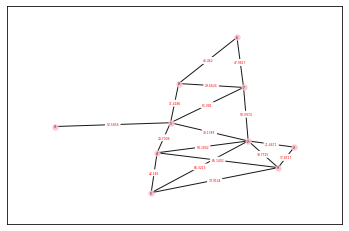

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw_networkx(n_GV,n_pos,edge_color='black',width=1,linewidths=0, node_size=40,node_color='pink',alpha=0.9, font_size=3, font_color = "black")
nx.draw_networkx_edge_labels(n_GV, n_pos,n_edge_labels, font_color='red',label_pos=0.5, font_size= 3,rotate=False)

# Set margins for the axes so that nodes aren't clipped
nax = plt.gca()
nax.margins(0.20)
plt.show()

## Utility
### 1. Graph
### 2. networkX : for visualization 
##### < DownLoad with '$ pip install networkx'
### 3. Pandas : for browse ExcelFile
### 4. matplotlib.pyplot : for visualization 
##### < Download with '$ python -m pip install -U matplotlib'
### 5. AdaptableHeapPriorityQueue : for dijkstra
### 5-1. HeapPriorityQueue : for AdaptableHeapPriorityQueue
### 5-2. PriorityQueueBase : for HeapPriorityQueue


### Graph variable = n_G
### Graph variable for visualization = n_GV

## ------------ Bellman Ford Algorithm ------------

In [299]:
# from "Geeks for Geeks"
# https://www.geeksforgeeks.org/bellman-ford-algorithm-dp-23/
# we changed this code to use our Graph class.

def bellmanFord(g, src):

    d = { } # d[v] is upper bound from s to v

    path = { } # map to get Shortest path

    # for each vertex v of the graph, add an entry to the priority queue, with
    # the source having distance 0 and all others having infinite distance
    for v in g.vertices( ):
        path[v] = []
        if v is src:
            d[v] = 0
            path[v].append(src)
        else:
            d[v] = float( 'inf' ) # syntax for positive infinity

    
    for i in g.vertices():
        for e in  g.edges():
            u = e.endpoint()[0]
            v = e.endpoint()[1]
            w = e.element()
            if d[u] != float('inf') and (d[u] + w) < d[v]:
                d[v]=d[u]+w
                path[v] = []
                for j in path[u]:
                    path[v].append(j)
                path[v].append(v)

            elif d[v] != float('inf') and (d[v] + w) < d[u]:
                d[u]= d[v]+w
                path[u] = []
                for j in path[v]:
                    path[u].append(j)
                path[u].append(u)

    for e in  g.edges():
        u = e.endpoint()[0]
        v = e.endpoint()[1]
        w = e.element()
        if d[u] != float('inf') and d[u] + w < d[v]:
            print("Graph contains negative weight cycle")
            
    # for i, j in path.items():
    #     print(i.element())
    #     for k in j:
    #         print(" ",k.element(), end= "")
    #     print("\n")
    return d , path

In [298]:
print(bellmanFord(n_G,n_verticesList[0]))

0
  0

1
  0  1

2
  0  1  2

3
  0  1  2  3

4
  0  1  4

5
  0  1  4  5

6
  0  1  8  6

7
  0  1  7

8
  0  1  8

9
  0  1  2  9

{<__main__.Graph.Vertex object at 0x000002609AE8F550>: 0, <__main__.Graph.Vertex object at 0x000002609AE8F430>: 52.5856, <__main__.Graph.Vertex object at 0x000002609AECC430>: 90.7645, <__main__.Graph.Vertex object at 0x000002609AECC460>: 112.2316, <__main__.Graph.Vertex object at 0x000002609AECC040>: 77.28620000000001, <__main__.Graph.Vertex object at 0x000002609AECC0D0>: 119.47120000000001, <__main__.Graph.Vertex object at 0x000002609AECC070>: 130.46620000000001, <__main__.Graph.Vertex object at 0x000002609AECC520>: 113.6666, <__main__.Graph.Vertex object at 0x000002609AECC580>: 84.0042, <__main__.Graph.Vertex object at 0x000002609AECC5B0>: 129.537}


## ------------ Djikstra Algorithm ------------

In [158]:
def dijkstra(g, src):
    """Compute shortest-path distances from src to reachable vertices of g.
Graph g can be undirected or directed, but must be weighted such that
e.element() returns a numeric weight for each edge e.

Return dictionary mapping each reachable vertex to its distance from src.
    """
    d = { } # d[v] is upper bound from s to v
    cloud = { } # map reachable v to its d[v] value
    pq = AdaptableHeapPriorityQueue() # vertex v will have key d[v]
    pqlocator = { } # map from vertex to its pq locator

    path = { } # map to get Shortest path

    # for each vertex v of the graph, add an entry to the priority queue, with
    # the source having distance 0 and all others having infinite distance
    for v in g.vertices( ):
        path[v] = []
        if v is src:
            d[v] = 0
            path[v].append(src)
        else:
            d[v] = float( 'inf' ) # syntax for positive infinity
        pqlocator[v] = pq.add(d[v], v) # save locator for future updates

    while not pq.is_empty( ):
        key, u = pq.remove_min( )
        cloud[u] = key # its correct d[u] value
        del pqlocator[u] # u is no longer in pq
        for e in g.incident_edges(u): # outgoing edges (u,v)
            v = e.opposite(u)
            if v not in cloud:
                # perform relaxation step on edge (u,v)
                wgt = e.element( )
                if d[u] + wgt < d[v]: # better path to v?
                    d[v] = d[u] + wgt # update the distance
                    pq.update(pqlocator[v], d[v], v) # update the pq entry
                    path[v] = []
                    for i in path[u]:
                        path[v].append(i)

                    # print("---u---")
                    # for i in path[u]:
                    #     print(i.element(),end=" ")
                    # print()

                    path[v].append(v)

                    # print("---v---")
                    # for i in path[v]:
                    #     print(i.element(),end=" ")
                    # print()

    # for i, j in path.items():
    #     print(i.element())
    #     for k in j:
    #         print(" ",k.element(), end= "")
    #     print("\n")

    return cloud, path

In [143]:
print(dijkstra(n_G,n_verticesList[0]))

0
  0

1
  0  1

2
  0  1  2

3
  0  1  2  3

4
  0  1  4

5
  0  1  4  5

6
  0  1  8  6

7
  0  1  7

8
  0  1  8

9
  0  1  2  9

({<__main__.Graph.Vertex object at 0x000002609AE8F550>: 0, <__main__.Graph.Vertex object at 0x000002609AE8F430>: 52.5856, <__main__.Graph.Vertex object at 0x000002609AECC040>: 77.28620000000001, <__main__.Graph.Vertex object at 0x000002609AECC580>: 84.0042, <__main__.Graph.Vertex object at 0x000002609AECC430>: 90.7645, <__main__.Graph.Vertex object at 0x000002609AECC460>: 112.2316, <__main__.Graph.Vertex object at 0x000002609AECC520>: 113.6666, <__main__.Graph.Vertex object at 0x000002609AECC0D0>: 119.47120000000001, <__main__.Graph.Vertex object at 0x000002609AECC5B0>: 129.537, <__main__.Graph.Vertex object at 0x000002609AECC070>: 130.46620000000001}, {<__main__.Graph.Vertex object at 0x000002609AE8F550>: [<__main__.Graph.Vertex object at 0x000002609AE8F550>], <__main__.Graph.Vertex object at 0x000002609AE8F430>: [<__main__.Graph.Vertex object at 0x00000

# ----------Sorting----------
## Insertion sort


In [26]:
# priority of Swing station - number of swings
pri=[]

for i in range(len(df["Pri"])):
    for j in range(len(SwingStation)):
        if (i+1) == SwingStation[j]:
            pri.append((n_verticesList[j],df['Pri'][i]))

print(pri)

[(<__main__.Graph.Vertex object at 0x000002609AECC0D0>, 0.5), (<__main__.Graph.Vertex object at 0x000002609AECC040>, 2.5), (<__main__.Graph.Vertex object at 0x000002609AECC5B0>, 1.5), (<__main__.Graph.Vertex object at 0x000002609AE8F550>, 0.0), (<__main__.Graph.Vertex object at 0x000002609AE8F430>, 3.0), (<__main__.Graph.Vertex object at 0x000002609AECC430>, 6.0), (<__main__.Graph.Vertex object at 0x000002609AECC460>, 4.0), (<__main__.Graph.Vertex object at 0x000002609AECC580>, 1.0), (<__main__.Graph.Vertex object at 0x000002609AECC520>, 3.5), (<__main__.Graph.Vertex object at 0x000002609AECC070>, 2.0)]


In [27]:
def insertion_sort(A):
    b = []
    for i in A:
        b.append(i)

    for i in range(1, len(b)):
        j = i-1
        while b[j][1] < b[j+1][1] and j >= 0:
            b[j], b[j+1] = b[j+1], b[j]
            j -= 1

    return b

In [28]:
print(insertion_sort(pri))

[(<__main__.Graph.Vertex object at 0x000002609AECC430>, 6.0), (<__main__.Graph.Vertex object at 0x000002609AECC460>, 4.0), (<__main__.Graph.Vertex object at 0x000002609AECC520>, 3.5), (<__main__.Graph.Vertex object at 0x000002609AE8F430>, 3.0), (<__main__.Graph.Vertex object at 0x000002609AECC040>, 2.5), (<__main__.Graph.Vertex object at 0x000002609AECC070>, 2.0), (<__main__.Graph.Vertex object at 0x000002609AECC5B0>, 1.5), (<__main__.Graph.Vertex object at 0x000002609AECC580>, 1.0), (<__main__.Graph.Vertex object at 0x000002609AECC0D0>, 0.5), (<__main__.Graph.Vertex object at 0x000002609AE8F550>, 0.0)]


## Quick sort

In [29]:
def quick_sort(inputArray):
    arr = []
    for i in inputArray:
        arr.append(i)
    """
    quick_sort sorts an array of integers.
    """
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2][1]
    left = [x for x in arr if x[1] > pivot]
    middle = [x for x in arr if x[1] == pivot]
    right = [x for x in arr if x[1] < pivot]

    return quick_sort(left) + middle + quick_sort(right)

In [30]:
print(quick_sort(pri))

[(<__main__.Graph.Vertex object at 0x000002609AECC430>, 6.0), (<__main__.Graph.Vertex object at 0x000002609AECC460>, 4.0), (<__main__.Graph.Vertex object at 0x000002609AECC520>, 3.5), (<__main__.Graph.Vertex object at 0x000002609AE8F430>, 3.0), (<__main__.Graph.Vertex object at 0x000002609AECC040>, 2.5), (<__main__.Graph.Vertex object at 0x000002609AECC070>, 2.0), (<__main__.Graph.Vertex object at 0x000002609AECC5B0>, 1.5), (<__main__.Graph.Vertex object at 0x000002609AECC580>, 1.0), (<__main__.Graph.Vertex object at 0x000002609AECC0D0>, 0.5), (<__main__.Graph.Vertex object at 0x000002609AE8F550>, 0.0)]


## Merge sort

In [31]:
def merge_sort(list):   # list = [(pri, vertex), ()  ]
    if len(list) <= 1:
        return list
    
    mid = len(list) // 2
    leftList = list[:mid]
    rightList = list[mid:]
    leftList = merge_sort(leftList)
    rightList = merge_sort(rightList)
    return merge(leftList, rightList)
    
def merge(left, right):     # left=[(pri1,vertext1)], right=[(pri2,vertex2)]
    result = []
    while len(left) > 0 or len(right) > 0:
        if len(left) > 0 and len(right) > 0:
            if left[0][1] >= right[0][1]:
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
        elif len(left) > 0:
            result.append(left[0])
            left = left[1:]
        elif len(right) > 0:
            result.append(right[0])
            right = right[1:]
    return result    

In [32]:
print(merge_sort(pri))

[(<__main__.Graph.Vertex object at 0x000002609AECC430>, 6.0), (<__main__.Graph.Vertex object at 0x000002609AECC460>, 4.0), (<__main__.Graph.Vertex object at 0x000002609AECC520>, 3.5), (<__main__.Graph.Vertex object at 0x000002609AE8F430>, 3.0), (<__main__.Graph.Vertex object at 0x000002609AECC040>, 2.5), (<__main__.Graph.Vertex object at 0x000002609AECC070>, 2.0), (<__main__.Graph.Vertex object at 0x000002609AECC5B0>, 1.5), (<__main__.Graph.Vertex object at 0x000002609AECC580>, 1.0), (<__main__.Graph.Vertex object at 0x000002609AECC0D0>, 0.5), (<__main__.Graph.Vertex object at 0x000002609AE8F550>, 0.0)]


## Integrated with sorting algorithms and shortest path algorithms

# ----------
### Our datasets to test the algorithm


In [34]:
to_go_list=[(2,7),(2,6,9),(2,7,8,9),(1,3,4,7,8),(1,2,4,5,7,9),(1,2,3,5,7,8,9),(1,2,3,4,5,6,8,9),(1,2,3,4,5,6,7,8,9)]

pri_dict = dict(pri)

# ----------

# Dijkstra Algorithm
## with insertion sort
### O(ElogV + n ^ 2)

In [198]:
# ex) sorted like, #3(very high), #6(middle), #4(low)
# find shortest path 'distance' from "First - #3, #3 - #6, #6 - #4"

def Dijk_insert(length):
    # build the list which contains tuples ---- [(vertex, priority), (vertex, priority) ... ]
    v_p_list = []
    for i in to_go_list[length-2]:
        v_p_list.append((n_verticesList[i], pri_dict[n_verticesList[i]]))

    # sorting with insertion sort
    sorted = insertion_sort(v_p_list)
    length_list = []

    # path list
    path = []

    for i in range(len(sorted)):
        # if the vertex is start point
        if i == 0:
            dijk_result = dijkstra(n_G,n_verticesList[0])[0]
            length_list.append(dijk_result[sorted[i][0]])

            path_result = dijkstra(n_G,n_verticesList[0])[1]
            path.append(path_result[sorted[i][0]])

        # else
        else:
            dijk_result = dijkstra(n_G,sorted[i-1][0])[0]
            length_list.append(dijk_result[sorted[i][0]])

            path_result = dijkstra(n_G,sorted[i-1][0])[1]
            path.append(path_result[sorted[i][0]])
            
    return length_list, path, sorted


# Dijkstra Algorithm
### with Quick sort
### O(ElogV + n log n)

In [211]:
def Dijk_quick(length):
    # build the list which contains tuples ---- [(vertex, priority), (v), (vertex, priority) ... ]
    v_p_list = []
    for i in to_go_list[length-2]:
        v_p_list.append((n_verticesList[i], pri_dict[n_verticesList[i]]))

    # sorting with quick sort
    sorted = quick_sort(v_p_list)
    length_list = []

    # path list
    path = []

    for i in range(len(sorted)):
        # if the vertex is start point
        if i == 0:
            dijk_result = dijkstra(n_G,n_verticesList[0])[0]
            length_list.append(dijk_result[sorted[i][0]])

            path_result = dijkstra(n_G,n_verticesList[0])[1]
            path.append(path_result[sorted[i][0]])
        # else
        else:
            dijk_result = dijkstra(n_G,sorted[i-1][0])[0]
            length_list.append(dijk_result[sorted[i][0]])

            path_result = dijkstra(n_G,sorted[i-1][0])[1]
            path.append(path_result[sorted[i][0]])

    return length_list,path, sorted


# Dijkstra Algorithm
### with Merge sort
### O(ElogV + n log n)

In [212]:
def Dijk_merge(length):
    # build the list which contains tuples ---- [(vertex, priority), (v), (vertex, priority) ... ]
    v_p_list = []
    for i in to_go_list[length-2]:
        v_p_list.append((n_verticesList[i], pri_dict[n_verticesList[i]]))

    # sorting with merge sort
    sorted = merge_sort(v_p_list)
    length_list = []

    # path list
    path = []

    for i in range(len(sorted)):
        # if the vertex is start point
        if i == 0:
            dijk_result = dijkstra(n_G,n_verticesList[0])[0]
            length_list.append(dijk_result[sorted[i][0]])

            path_result = dijkstra(n_G,n_verticesList[0])[1]
            path.append(path_result[sorted[i][0]])
        # else
        else:
            dijk_result = dijkstra(n_G,sorted[i-1][0])[0]
            length_list.append(dijk_result[sorted[i][0]])
            
            path_result = dijkstra(n_G,sorted[i-1][0])[1]
            path.append(path_result[sorted[i][0]])
            
    return length_list,path, sorted

In [214]:
len_list = []
for i in to_go_list[0]:
    len_list.append((n_verticesList[i], pri_dict[n_verticesList[i]]))

print(len_list)

print(Dijk_insert(5)[0])

sorted_5 = Dijk_insert(5)[2]
print("\n==이동 순서==")
for i in sorted_5:
    print(i[0].element(),end=" ")

print("\n\n==manager's path==")
Dijk_insert_5 = Dijk_insert(5)[1]
for i in Dijk_insert_5:
    for j in i:
        print(j.element(), end=" > ")
    print()

print("\n",Dijk_quick(3)[0])
print("\n",Dijk_merge(4)[0])

[(<__main__.Graph.Vertex object at 0x000002609AECC430>, 6.0), (<__main__.Graph.Vertex object at 0x000002609AECC520>, 3.5)]
[112.2316, 71.5645, 61.081, 24.7006, 56.119200000000006]

==이동 순서==
3 7 1 4 8 

==manager's path==
0 > 1 > 2 > 3 > 
3 > 2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 1 > 8 > 

 [90.7645, 98.0591, 136.8316]

 [90.7645, 50.0974, 88.8699, 108.37]


# Bellman_ford Algorithm
## with insert sort
### O(E V + n ^ 2)

In [318]:
def Bellman_ford_insertion(length):
    # build the list which contains tuples ---- [(vertex, priority), (v), (vertex, priority) ... ]
    v_p_list = []
    for i in to_go_list[length-2]:
        v_p_list.append((n_verticesList[i], pri_dict[n_verticesList[i]]))

    # sorting with insertion sort
    sorted = insertion_sort(v_p_list)
    length_list = []

    # path list
    path = []


    for i in range(len(sorted)):
        # if the vertex is start point
        if i == 0:
            bellman_result = bellmanFord(n_G,n_verticesList[0])[0]
            length_list.append(bellman_result[sorted[i][0]])

            path_result = bellmanFord(n_G,n_verticesList[0])[1]
            path.append(path_result[sorted[i][0]])

        # else
        else:
            bellman_result = bellmanFord(n_G,sorted[i-1][0])[0]
            length_list.append(bellman_result[sorted[i][0]])
            
            path_result = bellmanFord(n_G,sorted[i-1][0])[1]
            path.append(path_result[sorted[i][0]])
    return length_list,path, sorted


# Bellman_ford Algorithm
## with quick sort
### O(EV + n log n)

In [310]:
def Bellman_ford_quick(length):
    # build the list which contains tuples ---- [(vertex, priority), (vertex, priority) ... ]
    v_p_list = []
    for i in to_go_list[length-2]:
        v_p_list.append((n_verticesList[i], pri_dict[n_verticesList[i]]))

    # sorting with quick sort
    sorted = quick_sort(v_p_list)
    length_list = []
    
    # path list
    path = []


    for i in range(len(sorted)):
        # if the vertex is start point
        if i == 0:
            bellman_result = bellmanFord(n_G,n_verticesList[0])[0]
            length_list.append(bellman_result[sorted[i][0]])
    
            path_result = bellmanFord(n_G,n_verticesList[0])[1]
            path.append(path_result[sorted[i][0]])

        # else
        else:
            bellman_result = bellmanFord(n_G,sorted[i-1][0])[0]
            length_list.append(bellman_result[sorted[i][0]])
            
            path_result = bellmanFord(n_G,sorted[i-1][0])[1]
            path.append(path_result[sorted[i][0]])

    return length_list,path, sorted

# Bellman_ford Algorithm
## with merge sort
### O(E V + n log n)

In [319]:
def Bellman_ford_merge(length):
    # build the list which contains tuples ---- [(vertex, priority), (v), (vertex, priority) ... ]
    v_p_list = []
    for i in to_go_list[length-2]:
        v_p_list.append((n_verticesList[i], pri_dict[n_verticesList[i]]))

    # sorting with merge sort
    sorted = merge_sort(v_p_list)
    length_list = []
   
    # path list
    path = []

    for i in range(len(sorted)):
        # if the vertex is start point
        if i == 0:
            bellman_result = bellmanFord(n_G,n_verticesList[0])[0]
            length_list.append(bellman_result[sorted[i][0]])
            
            path_result = bellmanFord(n_G,n_verticesList[0])[1]
            path.append(path_result[sorted[i][0]])

        # else
        else:
            bellman_result = bellmanFord(n_G,sorted[i-1][0])[0]
            length_list.append(bellman_result[sorted[i][0]])
            
            path_result = bellmanFord(n_G,sorted[i-1][0])[1]
            path.append(path_result[sorted[i][0]])

    return length_list,path, sorted

In [316]:
print(Bellman_ford_insertion(5)[0])

sorted_5 = Bellman_ford_insertion(5)[2]
print("\n==이동 순서==")
for i in sorted_5:
    print(i[0].element(),end=" ")

print("\n\n==manager's path==")
Bellman_ford_insertion_5 = Bellman_ford_insertion(5)[1]
for i in Bellman_ford_insertion_5:
    for j in i:
        print(j.element(), end=" > ")
    print()

print("\n",Bellman_ford_insertion(3)[0])
print("\n",Bellman_ford_insertion(4)[0])

[112.2316, 71.5645, 61.081, 24.7006, 56.119200000000006]

==이동 순서==
3 7 1 4 8 

==manager's path==
0 > 1 > 2 > 3 > 
3 > 2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 1 > 8 > 

 [90.7645, 98.0591, 136.8316]

 [90.7645, 50.0974, 88.8699, 108.37]


# Get running time of algorithms

In [248]:
result_list_dijk_insertion = []
result_list_dijk_quick = []
result_list_dijk_merge = []

In [249]:
# Dijk_insertion
from time import time

Dijk_insert_time_list=[]

for i in range(2,10,1):
    start_time = time()
    result_list_dijk_insertion.append(Dijk_insert(i))
    end_time = time()
    elapsed = (end_time - start_time) * 10**7
    Dijk_insert_time_list.append(elapsed)

In [273]:
print(Dijk_insert_time_list)
for i in range(len(result_list_dijk_insertion)):
    print("=========")
    print("#Data:",i+2,"\n")
    print("- The order of stations the managers should go to -")
    for l in result_list_dijk_insertion[i][2]:
        print(l[0].element(), end=" ")
    print("\n\n-- Shortest path between stations --")
    for j in result_list_dijk_insertion[i][1]:
        for k in j:
            print(k.element(), end=" > ")
        print()
    print()


[10423.660278320312, 29520.98846435547, 40283.203125, 69718.3609008789, 51829.81491088867, 92024.8031616211, 69749.35531616211, 105807.78121948242]
#Data: 2 

- The order of stations the managers should go to -
2 7 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 

#Data: 3 

- The order of stations the managers should go to -
2 6 9 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 6 > 
6 > 7 > 2 > 9 > 

#Data: 4 

- The order of stations the managers should go to -
2 7 9 8 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 2 > 9 > 
9 > 2 > 1 > 8 > 

#Data: 5 

- The order of stations the managers should go to -
3 7 1 4 8 

-- Shortest path between stations --
0 > 1 > 2 > 3 > 
3 > 2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 1 > 8 > 

#Data: 6 

- The order of stations the managers should go to -
2 7 1 4 9 5 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 9 > 
9 > 5 > 

#Data: 7 

- The order of stations the managers should go to 

In [275]:
# Dijk_quick
from time import time

Dijk_quick_time_list=[]

for i in range(2,10,1):
    start_time = time()
    result_list_dijk_quick.append(Dijk_quick(i))
    end_time = time()
    elapsed = (end_time - start_time)* 10**7
    Dijk_quick_time_list.append(elapsed)

In [276]:
print(Dijk_quick_time_list)
for i in range(len(result_list_dijk_quick)):
    print("=========")
    print("#Data:",i+2,"\n")
    print("- The order of stations the managers should go to -")
    for l in result_list_dijk_quick[i][2]:
        print(l[0].element(), end=" ")
    print("\n\n-- Shortest path between stations --")
    for j in result_list_dijk_quick[i][1]:
        for k in j:
            print(k.element(), end=" > ")
        print()
    print()


[9453.296661376953, 9961.128234863281, 15554.428100585938, 29377.93731689453, 69665.90881347656, 39181.70928955078, 41995.04852294922, 89650.15411376953]
#Data: 2 

- The order of stations the managers should go to -
2 7 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 

#Data: 3 

- The order of stations the managers should go to -
2 6 9 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 6 > 
6 > 7 > 2 > 9 > 

#Data: 4 

- The order of stations the managers should go to -
2 7 9 8 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 2 > 9 > 
9 > 2 > 1 > 8 > 

#Data: 5 

- The order of stations the managers should go to -
3 7 1 4 8 

-- Shortest path between stations --
0 > 1 > 2 > 3 > 
3 > 2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 1 > 8 > 

#Data: 6 

- The order of stations the managers should go to -
2 7 1 4 9 5 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 9 > 
9 > 5 > 

#Data: 7 

- The order of stations the managers should 

In [278]:
# Dijk_merge
from time import time

Dijk_merge_time_list=[]

for i in range(2,10,1):
    start_time = time()
    result_list_dijk_merge.append(Dijk_merge(i))
    end_time = time()
    elapsed = (end_time - start_time)* 10**7
    Dijk_merge_time_list.append(elapsed)

In [279]:
print(Dijk_merge_time_list)
for i in range(len(result_list_dijk_merge)):
    print("=========")
    print("#Data:",i+2,"\n")
    print("- The order of stations the managers should go to -")
    for l in result_list_dijk_merge[i][2]:
        print(l[0].element(), end=" ")
    print("\n\n-- Shortest path between stations --")
    for j in result_list_dijk_merge[i][1]:
        for k in j:
            print(k.element(), end=" > ")
        print()
    print()

[19838.809967041016, 19867.420196533203, 20089.149475097656, 29747.486114501953, 49993.99185180664, 49641.13235473633, 39854.04968261719, 49848.55651855469]
#Data: 2 

- The order of stations the managers should go to -
2 7 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 

#Data: 3 

- The order of stations the managers should go to -
2 6 9 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 6 > 
6 > 7 > 2 > 9 > 

#Data: 4 

- The order of stations the managers should go to -
2 7 9 8 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 2 > 9 > 
9 > 2 > 1 > 8 > 

#Data: 5 

- The order of stations the managers should go to -
3 7 1 4 8 

-- Shortest path between stations --
0 > 1 > 2 > 3 > 
3 > 2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 1 > 8 > 

#Data: 6 

- The order of stations the managers should go to -
2 7 1 4 9 5 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 9 > 
9 > 5 > 

#Data: 7 

- The order of stations the managers shou

In [328]:
result_list_bellman_insert = []
result_list_bellman_quick = []
result_list_bellman_merge = []

In [329]:
# Bellman_insertion
from time import time

Bellman_insertion_time_list=[]

for i in range(2,10,1):
    start_time = time()
    result_list_bellman_insert.append(Bellman_ford_insertion(i))
    end_time = time()
    elapsed = (end_time - start_time)* 10**7
    Bellman_insertion_time_list.append(elapsed)

In [330]:
print(Bellman_insertion_time_list)

for i in range(len(result_list_bellman_insert)):
    print("=========")
    print("#Data:",i+2,"\n")
    print("- The order of stations the managers should go to -")
    for l in result_list_bellman_insert[i][2]:
        print(l[0].element(), end=" ")
    print("\n\n-- Shortest path between stations --")
    for j in result_list_bellman_insert[i][1]:
        for k in j:
            print(k.element(), end=" > ")
        print()
    print()

[49307.34634399414, 59783.4587097168, 79751.01470947266, 80337.5244140625, 109028.81622314453, 123164.65377807617, 139541.6259765625, 169622.89810180664]
#Data: 2 

- The order of stations the managers should go to -
2 7 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 

#Data: 3 

- The order of stations the managers should go to -
2 6 9 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 6 > 
6 > 7 > 2 > 9 > 

#Data: 4 

- The order of stations the managers should go to -
2 7 9 8 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 2 > 9 > 
9 > 2 > 1 > 8 > 

#Data: 5 

- The order of stations the managers should go to -
3 7 1 4 8 

-- Shortest path between stations --
0 > 1 > 2 > 3 > 
3 > 2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 1 > 8 > 

#Data: 6 

- The order of stations the managers should go to -
2 7 1 4 9 5 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 9 > 
9 > 5 > 

#Data: 7 

- The order of stations the managers should 

In [332]:
# Bellman_quick
from time import time

Bellman_quick_time_list=[]

for i in range(2,10,1):
    start_time = time()
    result_list_bellman_quick.append(Bellman_ford_quick(i))
    end_time = time()
    elapsed = (end_time - start_time)* 10**7
    Bellman_quick_time_list.append(elapsed)

In [333]:
print(Bellman_quick_time_list)

for i in range(len(result_list_bellman_quick)):
    print("=========")
    print("#Data:",i+2,"\n")
    print("- The order of stations the managers should go to -")
    for l in result_list_bellman_quick[i][2]:
        print(l[0].element(), end=" ")
    print("\n\n-- Shortest path between stations --")
    for j in result_list_bellman_quick[i][1]:
        for k in j:
            print(k.element(), end=" > ")
        print()
    print()

[30255.31768798828, 29544.830322265625, 99654.1976928711, 80218.31512451172, 164129.73403930664, 150032.04345703125, 179293.15567016602, 229032.03964233398]
#Data: 2 

- The order of stations the managers should go to -
2 7 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 

#Data: 3 

- The order of stations the managers should go to -
2 6 9 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 6 > 
6 > 7 > 2 > 9 > 

#Data: 4 

- The order of stations the managers should go to -
2 7 9 8 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 2 > 9 > 
9 > 2 > 1 > 8 > 

#Data: 5 

- The order of stations the managers should go to -
3 7 1 4 8 

-- Shortest path between stations --
0 > 1 > 2 > 3 > 
3 > 2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 1 > 8 > 

#Data: 6 

- The order of stations the managers should go to -
2 7 1 4 9 5 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 9 > 
9 > 5 > 

#Data: 7 

- The order of stations the managers shou

In [334]:
# Bellman_merge
from time import time

Bellman_merge_time_list=[]

for i in range(2,10,1):
    start_time = time()
    result_list_bellman_merge.append(Bellman_ford_merge(i))
    end_time = time()
    elapsed = (end_time - start_time)* 10**7
    Bellman_merge_time_list.append(elapsed)

In [335]:
print(Bellman_merge_time_list)

for i in range(len(result_list_bellman_merge)):
    print("=========")
    print("#Data:",i+2,"\n")
    print("- The order of stations the managers should go to -")
    for l in result_list_bellman_merge[i][2]:
        print(l[0].element(), end=" ")
    print("\n\n-- Shortest path between stations --")
    for j in result_list_bellman_merge[i][1]:
        for k in j:
            print(k.element(), end=" > ")
        print()
    print()

[59766.76940917969, 178956.9854736328, 189676.28479003906, 227911.47232055664, 180068.0160522461, 239763.2598876953, 208673.47717285156, 219295.02487182617]
#Data: 2 

- The order of stations the managers should go to -
2 7 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 

#Data: 3 

- The order of stations the managers should go to -
2 6 9 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 6 > 
6 > 7 > 2 > 9 > 

#Data: 4 

- The order of stations the managers should go to -
2 7 9 8 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 2 > 9 > 
9 > 2 > 1 > 8 > 

#Data: 5 

- The order of stations the managers should go to -
3 7 1 4 8 

-- Shortest path between stations --
0 > 1 > 2 > 3 > 
3 > 2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 1 > 8 > 

#Data: 6 

- The order of stations the managers should go to -
2 7 1 4 9 5 

-- Shortest path between stations --
0 > 1 > 2 > 
2 > 7 > 
7 > 1 > 
1 > 4 > 
4 > 9 > 
9 > 5 > 

#Data: 7 

- The order of stations the managers shou

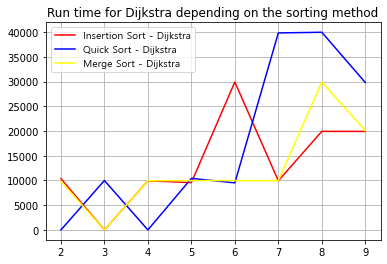

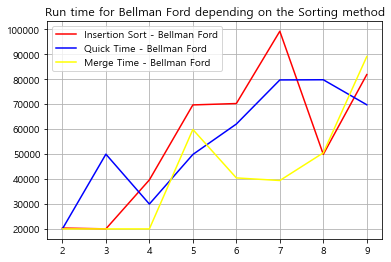

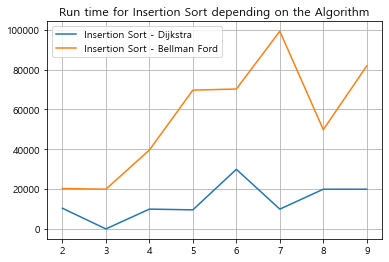

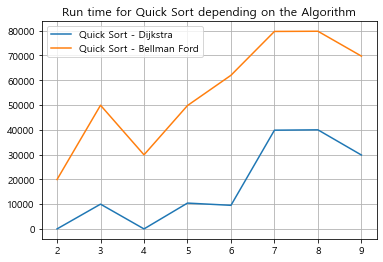

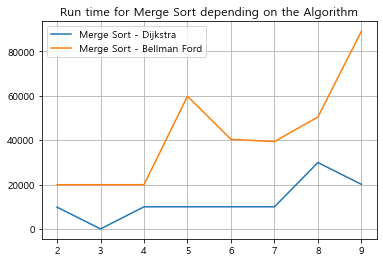

In [215]:
import matplotlib.pyplot as pyplot
x = [2,3,4,5,6,7,8,9]

# Dijkstra algorithm -> difference of time with sorting method
plt.plot(x, Dijk_insert_time_list, label="Insertion Sort - Dijkstra", color="red")
plt.plot(x, Dijk_quick_time_list, label="Quick Sort - Dijkstra", color="blue")
plt.plot(x, Dijk_merge_time_list, label="Merge Sort - Dijkstra", color="yellow")
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
plt.grid(True)
plt.title("Run time for Dijkstra depending on the sorting method")
plt.legend(loc=2)
plt.show()

# Bellman_ford algorithm -> difference of time with sorting method
plt.plot(x, Bellman_insertion_time_list, label="Insertion Sort - Bellman Ford", c='red')
plt.plot(x, Bellman_quick_time_list, label="Quick Time - Bellman Ford", c='blue')
plt.plot(x, Bellman_merge_time_list, label="Merge Time - Bellman Ford", c='yellow')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
plt.grid(True)
plt.title("Run time for Bellman Ford depending on the Sorting method")
plt.legend(loc=2)
plt.show()

# insertion sort -> difference of time with shortest path algorithm
plt.plot(x, Dijk_insert_time_list, label="Insertion Sort - Dijkstra")
plt.plot(x, Bellman_insertion_time_list, label="Insertion Sort - Bellman Ford")
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
plt.grid(True)
plt.title("Run time for Insertion Sort depending on the Algorithm")
plt.legend(loc=2)
plt.show()

# quick sort -> difference of time with shortest path algorithm
plt.plot(x, Dijk_quick_time_list, label="Quick Sort - Dijkstra")
plt.plot(x, Bellman_quick_time_list, label="Quick Sort - Bellman Ford")
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
plt.grid(True)
plt.title("Run time for Quick Sort depending on the Algorithm")
plt.legend(loc=2)
plt.show()

# merge sort -> difference of time with shortest path algorithm
plt.plot(x, Dijk_merge_time_list, label="Merge Sort - Dijkstra")
plt.plot(x, Bellman_merge_time_list, label="Merge Sort - Bellman Ford")
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
plt.grid(True)
plt.title("Run time for Merge Sort depending on the Algorithm")
plt.legend(loc=2)
plt.show()

In [594]:
num = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]

for j in range(8):
    for i in result_list_dijk_insertion[j]:
        num[j][0] += i
    for i in result_list_dijk_quick[j]:
        num[j][1] += i
    for i in result_list_dijk_merge[j]:
        num[j][2] += i
    for i in result_list_bellman_insert[j]:
        num[j][3] += i
    for i in result_list_bellman_quick[j]:
        num[j][4] += i
    for i in result_list_bellman_merge[j]:
        num[j][5] += i


for i in num:
    print(i)

[140.8619, 140.8619, 140.8619, 140.8619, 140.8619, 140.8619]
[325.65520000000004, 325.65520000000004, 325.65520000000004, 325.65520000000004, 325.65520000000004, 325.65520000000004]
[338.1018, 338.1018, 338.1018, 338.1018, 338.1018, 338.1018]
[325.6969, 325.6969, 325.6969, 325.6969, 325.6969, 325.6969]
[371.6981, 371.6981, 371.6981, 371.6981, 371.6981, 371.6981]
[528.5027, 528.5027, 528.5027, 528.5027, 528.5027, 528.5027]
[642.6652, 642.6652, 642.6652, 642.6652, 642.6652, 642.6652]
[715.6647, 715.6647, 715.6647, 715.6647, 715.6647, 715.6647]
